In [2]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly as py
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score,plot_confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from lightgbm import LGBMClassifier



In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/kaggle_diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


## Analasis of Distribution of every feature in this dataset

In [10]:
def hist_maker(feature, name):
  enable_plotly_in_cell()
  fig = go.Figure()
  fig.add_trace(
      go.Histogram(
          x = feature,
          marker_color = 'rgb(252,232,0)'
      )
  )
  #fig = px.histogram(data,x=feature, title=f'Distribtion of {feature}')
  fig.update_layout(
    title = f'Distribtion of {name}',
    title_x=0.5,
    xaxis=dict(
        linecolor='rgb(34,56,78)',
        showline=True,
        showgrid=False,
        showticklabels=True,
        ticks='outside',
        tickfont=dict(
            family='arial',
            size=15,
            color='Black'
        )
    ),
    yaxis = dict(
        title = 'Count',
        linecolor='rgb(34,56,78)',
        showline=True,
        showgrid=True,
        gridwidth = 3,
        showticklabels=True,
        ticks='outside',
        tickfont=dict(
            family='arial',
            size=15,
            color='Black'
        )
    ),
    plot_bgcolor = 'rgb(243,243,243)',
    paper_bgcolor = 'rgb(243,243,243)'
    
  )

  fig.show()


In [9]:
 features = data.columns.to_list()
 for feature in features:
   hist_maker(data[feature], feature)

Output hidden; open in https://colab.research.google.com to view.

Inference: By looking at the distribtion we can see that the dataset does not contain any null value but it contains lots of zeros in features where it does not makes sense so data cleaning and imputation is required.

# DATA CLEANING

In [11]:

def cleaner(Outcome,feature):
  data.loc[((data.Outcome == Outcome) & (data[feature] == 0)), feature] = data.loc[(data.Outcome == Outcome),feature].median()


In [12]:
lst = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']
for Outcome in range(2):
  for feature in lst:
    cleaner(Outcome, feature)


In [13]:
 for feature in features:
   hist_maker(data[feature], feature)

Output hidden; open in https://colab.research.google.com to view.

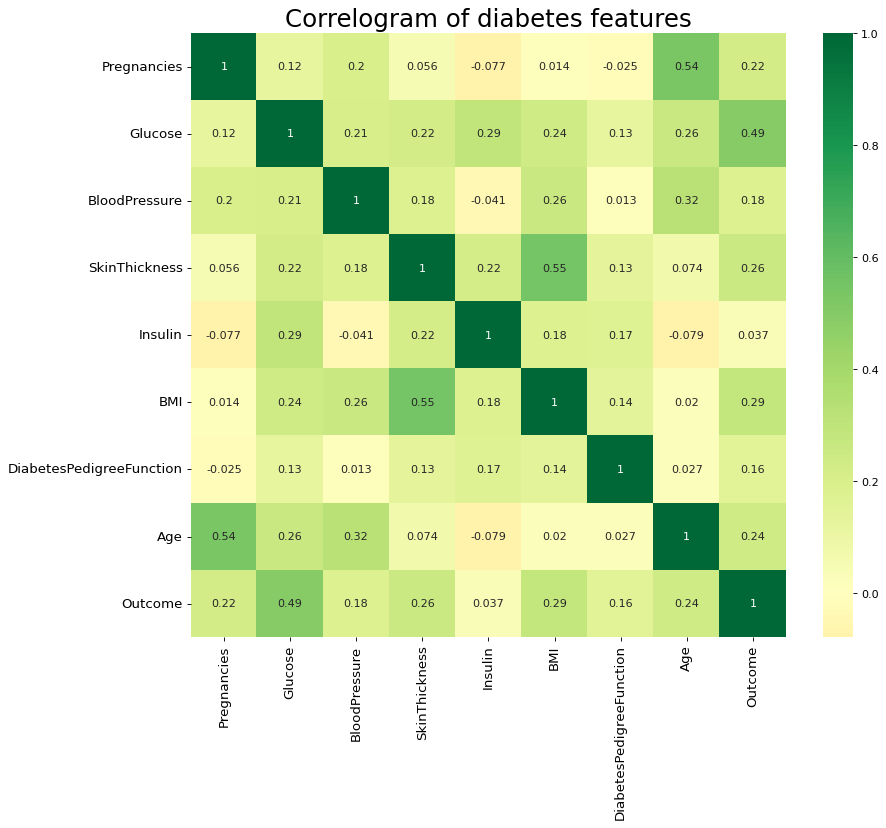

In [14]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram of diabetes features', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [15]:
def pie_chart_maker(df, title):
    enable_plotly_in_cell()
    colors = ['rgb(252,232,0)','rgb(35,31,32)']
    pie1 = go.Figure()
    pie1.add_trace(
            go.Pie(
                labels=df.value_counts().index.to_list(),
                values=df.value_counts()

            )
        )
    pie1.update_traces(
        title = title,
        titleposition ='bottom center',
        titlefont = dict(
            family='arial',
            size=25,
            color='Black'

        ),
        pull =[0.2,0],
        hoverinfo='label+percent',
        textinfo='label+percent',
        marker=dict(
        colors=colors
       )
    )
    pie1.update_layout(
        paper_bgcolor = 'rgb(243,243,243)',
        plot_bgcolor = 'rgb(243,243,243)'
    )
    pie1.show()

Outcome

In [16]:
pie_chart_maker(data['Outcome'],'Outcome')

Output hidden; open in https://colab.research.google.com to view.

In [17]:
def box_plot(series1, series2, name):
    enable_plotly_in_cell()
    fig=go.Figure()
    fig.add_trace(

        go.Box(
            y= series1,
            boxmean='sd',boxpoints='all',
            fillcolor='rgb(232,232,0)',
            name = name+'0',
            marker=dict(
                size=5,
                color='rgb(35,31,32)'
            ),
            line=dict(width=1)


        )

    )
    fig.add_trace(

        go.Box(
            y= series2,
            boxmean='sd',boxpoints='all',
            fillcolor='rgb(232,232,0)',
            name = name+'1',
            marker=dict(
                size=5,
                color='rgb(35,31,32)'
            ),
            line=dict(width=1)


        )

    )
    fig.update_layout(
        title = name,
        yaxis=dict(
            gridwidth=3,
            tickfont=dict(
                family='arial',
                size=15,
                color='Black'
            ),
        ),

        paper_bgcolor='rgb(243,243,243)',
        plot_bgcolor='rgb(243,243,243)'

    )
    fig.show()
    

In [18]:
lst = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','DiabetesPedigreeFunction']
for el in lst:
  box_plot(data.loc[data.Outcome == 0, el],data.loc[data.Outcome == 1, el], el)

Output hidden; open in https://colab.research.google.com to view.

## MODELING

In [ ]:
X = data.drop(columns='Outcome')
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Dimensionality reduction methods for visualization

In [20]:
pca=PCA(n_components=2)
trans=pca.fit_transform(X_train)
enable_plotly_in_cell()
px.scatter(trans,x=trans[:,0],y=trans[:,1],color=y_train)



Output hidden; open in https://colab.research.google.com to view.

In [21]:
tsne=TSNE(n_components=2,learning_rate='auto')
trans=tsne.fit_transform(X_train)
enable_plotly_in_cell()
px.scatter(trans,x=trans[:,0],y=trans[:,1],color=y_train)

Output hidden; open in https://colab.research.google.com to view.

In [22]:
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        },
        'GradientBoostingClassifier':{
            'model': GradientBoostingClassifier(random_state=1),
            'parameters': {
                'learning_rate': [0.01,0.1,0.5,1,10,100],
                'n_estimators': [50,100,150,200]
            }
        },
        'LightGBC':{
            'model': LGBMClassifier(random_state=1),
            'parameters': {
                'learning_rate': [0.01,0.1,0.5,1,10,100],
                'max_depth':[5,10,15,20]
            }            
        },
        'XGBoost':{
            'model': xgb.XGBClassifier(),
            'parameters': {
                'learning_rate': [0.01,0.1,0.5,1,10,100],
                'max_depth':[5,10,15,20],
                'n_estimators':[50,100,150]
            }        
        },
        'AdaBoost':{
            'model': AdaBoostClassifier(),
            'parameters': {
                'learning_rate': [0.01,0.1,0.5,1,10,100],
                'n_estimators':[50,100,150],
                'algorithm':['SAMME', 'SAMME.R']
            }    
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.770625
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 10}",0.967500
2,random_forest,{'n_estimators': 50},0.981875
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.933125
4,GradientBoostingClassifier,"{'learning_rate': 0.5, 'n_estimators': 150}",0.985625
5,LightGBC,"{'learning_rate': 0.1, 'max_depth': 20}",0.985000
6,XGBoost,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.986875
7,AdaBoost,"{'algorithm': 'SAMME.R', 'learning_rate': 1, '...",0.956250


In [23]:
vot=[
    ('XGBOOST',xgb.XGBClassifier(learning_rate=0.1, max_depth=10, n_estimators=50)),
    ('LightGBC',LGBMClassifier(random_state=1, learning_rate=0.1, max_depth=20)),
    ('random forest', RandomForestClassifier(criterion='gini',n_estimators=50)),
    ('adaboost',AdaBoostClassifier(learning_rate=1,algorithm='SAMME.R',n_estimators=100))
]

In [24]:
voter=VotingClassifier(estimators=vot)
voter.fit(X_train,y_train)
print("Training accuracy : ",accuracy_score(y_train, voter.predict(X_train)))
print("Testing accuracy : ",accuracy_score(y_test, voter.predict(X_test)))


Training accuracy :  0.99875
Testing accuracy :  0.9925


In [25]:
voter_cv=cross_validate(voter,X,y,cv=5,return_train_score=True)
print("Training accuracy : ", voter_cv['train_score'].mean())
print("Testing accuracy : ", voter_cv['test_score'].mean())

Training accuracy :  0.99975
Testing accuracy :  0.9949999999999999


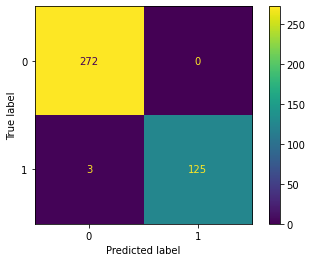

In [26]:
plot_confusion_matrix(voter, X_test, y_test) 

In [27]:
print(classification_report(y_test, voter.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       272
           1       1.00      0.98      0.99       128

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [28]:
food_data = pd.read_csv('/content/drive/MyDrive/food.csv')

In [29]:
food_data.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Kilocalories,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Manganese,Data.Niacin,Data.Pantothenic Acid,Data.Protein,Data.Refuse Percentage,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Household Weights.1st Household Weight,Data.Household Weights.1st Household Weight Description,Data.Household Weights.2nd Household Weight,Data.Household Weights.2nd Household Weight Description,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,0.0,717,0,0,0.000,0.042,0.110,0.85,0,671,0.034,1.0,0.06,0.005,15.87,21.021,3.043,51.368,81.11,227.00,1 cup,14,1 tbsp,24,0.000,0.02,2,24,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,0.0,717,0,0,0.004,0.042,0.110,0.85,0,671,0.034,1.0,0.06,0.005,15.87,23.426,3.012,50.489,81.11,151.00,1 cup,9,1 tbsp,24,0.016,0.16,2,23,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,0.0,876,0,0,0.000,0.003,0.010,0.28,0,824,0.005,0.0,0.00,0.001,0.24,28.732,3.694,61.924,99.48,205.00,1 cup,13,1 tbsp,4,0.001,0.00,0,3,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,0.0,353,0,0,0.009,1.016,1.729,21.40,0,192,0.382,14.5,0.50,0.029,42.41,7.778,0.800,18.669,28.74,28.35,1 oz,17,1 cubic inch,528,0.040,0.31,23,387,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,0.0,371,0,0,0.012,0.118,0.288,23.24,0,286,0.351,14.5,0.51,0.014,41.11,8.598,0.784,18.764,29.68,132.00,"1 cup, diced",113,"1 cup, shredded",674,0.024,0.43,24,451,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


In [30]:
food_data.columns

Index(['Category', 'Description', 'Nutrient Data Bank Number',
       'Data.Alpha Carotene', 'Data.Ash', 'Data.Beta Carotene',
       'Data.Beta Cryptoxanthin', 'Data.Carbohydrate', 'Data.Cholesterol',
       'Data.Choline', 'Data.Fiber', 'Data.Kilocalories',
       'Data.Lutein and Zeaxanthin', 'Data.Lycopene', 'Data.Manganese',
       'Data.Niacin', 'Data.Pantothenic Acid', 'Data.Protein',
       'Data.Refuse Percentage', 'Data.Retinol', 'Data.Riboflavin',
       'Data.Selenium', 'Data.Sugar Total', 'Data.Thiamin', 'Data.Water',
       'Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat',
       'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid',
       'Data.Household Weights.1st Household Weight',
       'Data.Household Weights.1st Household Weight Description',
       'Data.Household Weights.2nd Household Weight',
       'Data.Household Weights.2nd Household Weight Description',
       'Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper',
       'Data.Major Minerals.Iro

In [32]:
food_diabetes_data = food_data.loc[:,['Category','Description','Data.Sugar Total']]

In [33]:
food_diabetes_data = food_diabetes_data.rename(columns={'Data.Sugar Total' : 'Sugar'})

**Food Recommended for a Diabetic Person**

In [35]:
diab_rec=food_diabetes_data.loc[food_diabetes_data.groupby(by='Category').Sugar.idxmin()].sort_values('Sugar')
diab_rec.head(25)

,Category,Description,Sugar
4445,ABALONE,"ABALONE,MIXED SPECIES,RAW",0.0
556,OIL,"OIL,SOYBN,SALAD OR COOKING,(PARTIALLY HYDROGEN...",0.0
6661,OLD EL PASO CHILI W/BNS,"OLD EL PASO CHILI W/BNS,CND ENTREE",0.0
1593,OLIVE LOAF,"OLIVE LOAF,PORK",0.0
2345,OLIVES,"OLIVES,RIPE,CND (SMALL-EXTRA LRG)",0.0
3039,ONION RINGS,"ONION RINGS,BREADED,PAR FR,FRZ,UNPREP",0.0
3030,ONIONS,"ONIONS,YEL,SAUTEED",0.0
7060,OOPAH (TUNICATE),"OOPAH (TUNICATE),WHL ANIMAL (ALASKA NATIVE)",0.0
2355,ORANGE JUC,"ORANGE JUC,CHILLED,INCL FROM CONC",0.0
2359,ORANGE PEEL,"ORANGE PEEL,RAW",0.0
